<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.478397,31.875367,82.395914,6.793580,180.543258,175.054608,5.488650
1,0.0,1.0,74.881906,70.006776,92.875836,18.427718,266.192234,249.283901,16.908334
2,0.0,2.0,42.642662,75.697409,55.557111,4.079452,187.976633,183.492562,4.484071
3,0.0,3.0,90.718881,21.541878,53.094816,-17.042875,158.312701,175.471384,-17.158683
4,0.0,4.0,85.402368,70.227312,78.819603,-51.030126,193.419157,245.324370,-51.905213
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.523131,95.980734,60.647124,93.585252,314.736242,222.707005,92.029237
249996,999.0,246.0,55.494252,79.776291,59.437658,-4.583323,200.124878,205.952767,-5.827889
249997,999.0,247.0,65.456736,65.205118,71.099706,35.286274,247.047834,214.154240,32.893594
249998,999.0,248.0,74.559827,48.118132,83.452587,6.190666,222.321212,219.525419,2.795792


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.478397,31.875367,82.395914,6.793580,180.543258,175.054608,5.488650
1,0.0,1.0,74.881906,70.006776,92.875836,18.427718,266.192234,249.283901,16.908334
2,0.0,2.0,42.642662,75.697409,55.557111,4.079452,187.976633,183.492562,4.484071
3,0.0,3.0,90.718881,21.541878,53.094816,-17.042875,158.312701,175.471384,-17.158683
4,0.0,4.0,85.402368,70.227312,78.819603,-51.030126,193.419157,245.324370,-51.905213
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.523131,95.980734,60.647124,93.585252,314.736242,222.707005,92.029237
249996,999.0,246.0,55.494252,79.776291,59.437658,-4.583323,200.124878,205.952767,-5.827889
249997,999.0,247.0,65.456736,65.205118,71.099706,35.286274,247.047834,214.154240,32.893594
249998,999.0,248.0,74.559827,48.118132,83.452587,6.190666,222.321212,219.525419,2.795792


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    49.478397  31.875367  82.395914  ...  180.543258  175.054608   5.488650
      1.0    74.881906  70.006776  92.875836  ...  266.192234  249.283901  16.908334
      2.0    42.642662  75.697409  55.557111  ...  187.976633  183.492562   4.484071
      3.0    90.718881  21.541878  53.094816  ...  158.312701  175.471384 -17.158683
      4.0    85.402368  70.227312  78.819603  ...  193.419157  245.324370 -51.905213
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  54.523131  95.980734  60.647124  ...  314.736242  222.707005  92.029237
      246.0  55.494252  79.776291  59.437658  ...  200.124878  205.952767  -5.827889
      247.0  65.456736  65.205118  71.099706  ...  247.047834  214.154240  32.893594
      248.0  74.559827  48.118132  83.452587  ...  222.321212  219.525419   2.795792
      249.0  45.600222  24.522540  78.851412  ...  146.833442  158.202408 -11.368966

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    49.478397  31.875367  82.395914  ...  180.543258  175.054608   5.488650
      1.0    74.881906  70.006776  92.875836  ...  266.192234  249.283901  16.908334
      2.0    42.642662  75.697409  55.557111  ...  187.976633  183.492562   4.484071
      3.0    90.718881  21.541878  53.094816  ...  158.312701  175.471384 -17.158683
      4.0    85.402368  70.227312  78.819603  ...  193.419157  245.324370 -51.905213
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  54.523131  95.980734  60.647124  ...  314.736242  222.707005  92.029237
      246.0  55.494252  79.776291  59.437658  ...  200.124878  205.952767  -5.827889
      247.0  65.456736  65.205118  71.099706  ...  247.047834  214.154240  32.893594
      248.0  74.559827  48.118132  83.452587  ...  222.321212  219.525419   2.795792
      249.0  45.600222  24.522540  78.851412  ...  146.833442  158.202408 -11.368966

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.478397,31.875367,82.395914,6.793580,180.543258,175.054608,5.488650
1,0.0,1.0,74.881906,70.006776,92.875836,18.427718,266.192234,249.283901,16.908334
2,0.0,2.0,42.642662,75.697409,55.557111,4.079452,187.976633,183.492562,4.484071
3,0.0,3.0,90.718881,21.541878,53.094816,-17.042875,158.312701,175.471384,-17.158683
4,0.0,4.0,85.402368,70.227312,78.819603,-51.030126,193.419157,245.324370,-51.905213
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.523131,95.980734,60.647124,93.585252,314.736242,222.707005,92.029237
249996,999.0,246.0,55.494252,79.776291,59.437658,-4.583323,200.124878,205.952767,-5.827889
249997,999.0,247.0,65.456736,65.205118,71.099706,35.286274,247.047834,214.154240,32.893594
249998,999.0,248.0,74.559827,48.118132,83.452587,6.190666,222.321212,219.525419,2.795792


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    49.478397  31.875367  82.395914  ...  180.543258  175.054608   5.488650
      1.0    74.881906  70.006776  92.875836  ...  266.192234  249.283901  16.908334
      2.0    42.642662  75.697409  55.557111  ...  187.976633  183.492562   4.484071
      3.0    90.718881  21.541878  53.094816  ...  158.312701  175.471384 -17.158683
      4.0    85.402368  70.227312  78.819603  ...  193.419157  245.324370 -51.905213
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  54.523131  95.980734  60.647124  ...  314.736242  222.707005  92.029237
      246.0  55.494252  79.776291  59.437658  ...  200.124878  205.952767  -5.827889
      247.0  65.456736  65.205118  71.099706  ...  247.047834  214.154240  32.893594
      248.0  74.559827  48.118132  83.452587  ...  222.321212  219.525419   2.795792
      249.0  45.600222  24.522540  78.851412  ...  146.833442  158.202408 -11.368966

[250000 rows x 7 columns]

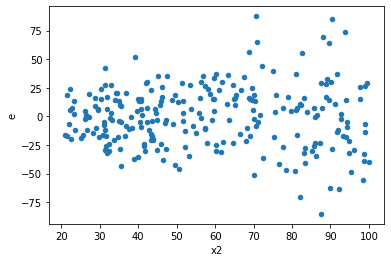

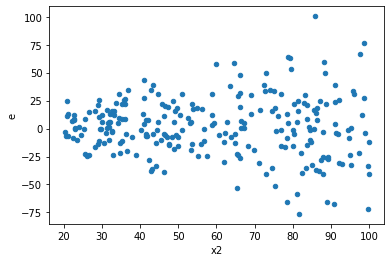

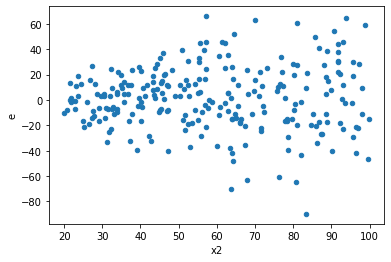

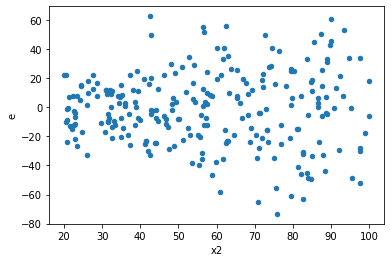

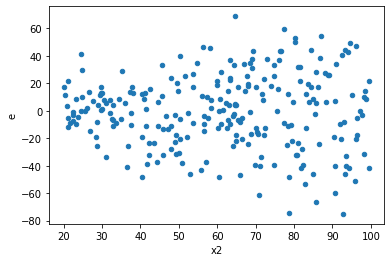

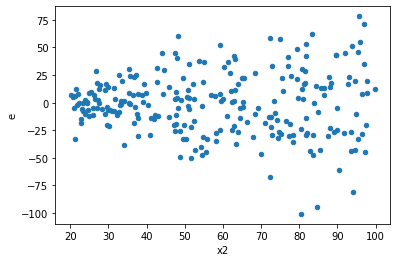

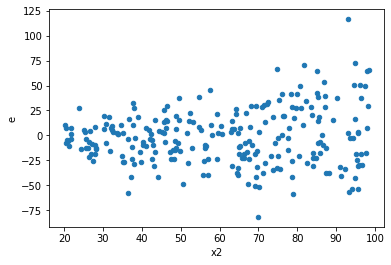

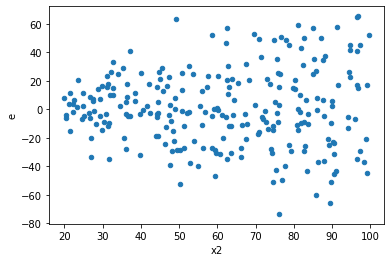

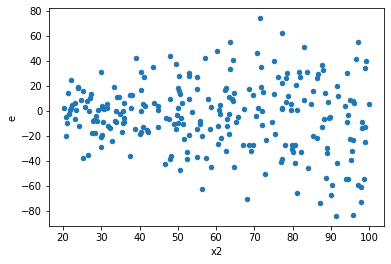

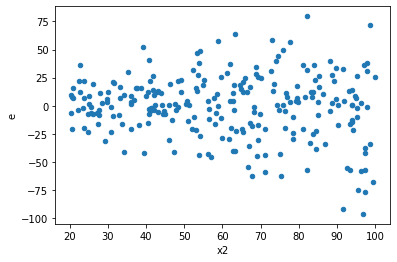

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,35751.5957661665,109415.99004455637,368.57315222852066,1127.9998973665606,3.0604505253469587,8.298366904746501e-08,0.9999999585081655,4.149183452373251e-08,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,29431.207700778516,108295.04420585117,303.41451237915993,1116.4437546994966,3.679599060523315,5.915505862930104e-10,0.9999999997042247,2.957752931465052e-10,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,24880.257425040127,89953.6735828198,256.4974992272178,927.357459616699,3.615463941795398,9.710532378193193e-10,0.9999999995144734,4.855266189096596e-10,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,28459.53324112505,89471.1298689367,293.39724990850567,922.3827821539866,3.1438017310715303,4.179752255417668e-08,0.9999999791012387,2.089876127708834e-08,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,39939.32513536601,109510.06402504919,411.7456199522269,1128.9697322170018,2.741910727181485,1.2030798579587554e-06,0.999999398460071,6.015399289793777e-07,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,31674.314160089336,122918.25535476561,326.5393212380344,1267.1985088120166,3.880691930171186,1.2819501016281265e-10,0.9999999999359025,6.409750508140633e-11,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,29901.18973391321,123901.41553508141,308.2596879784867,1277.334180774035,4.143695171920046,1.8353318864683388e-11,0.9999999999908233,9.176659432341694e-12,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,34533.998208218625,104518.41550009859,356.0206000847281,1077.5094381453464,3.026536773121875,1.0988184939719758e-07,0.9999999450590753,5.494092469859879e-08,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,32031.3857954056,110652.01195678719,330.2204721175835,1140.7423913070845,3.4544871915175928,3.426574579634689e-09,0.9999999982867127,1.7132872898173446e-09,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,35751.5957661665,109415.99004455637,368.57315222852066,1127.9998973665606,3.0604505253469587,8.298366904746501e-08,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,29431.207700778516,108295.04420585117,303.41451237915993,1116.4437546994966,3.679599060523315,5.915505862930104e-10,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,24880.257425040127,89953.6735828198,256.4974992272178,927.357459616699,3.615463941795398,9.710532378193193e-10,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,28459.53324112505,89471.1298689367,293.39724990850567,922.3827821539866,3.1438017310715303,4.179752255417668e-08,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,39939.32513536601,109510.06402504919,411.7456199522269,1128.9697322170018,2.741910727181485,1.2030798579587554e-06,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,31674.314160089336,122918.25535476561,326.5393212380344,1267.1985088120166,3.880691930171186,1.2819501016281265e-10,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,29901.18973391321,123901.41553508141,308.2596879784867,1277.334180774035,4.143695171920046,1.8353318864683388e-11,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,34533.998208218625,104518.41550009859,356.0206000847281,1077.5094381453464,3.026536773121875,1.0988184939719758e-07,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,32031.3857954056,110652.01195678719,330.2204721175835,1140.7423913070845,3.4544871915175928,3.426574579634689e-09,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64